**<font color = black size=6>实验十一: Q-learning</font>**

**<font color = blue size=4>第一部分: Q-learning算法介绍</font>**

Q-learning伪代码:

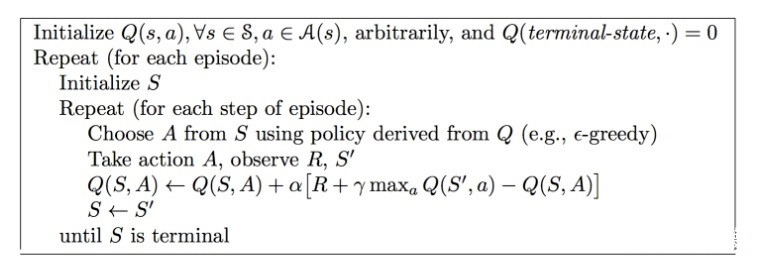

初始化Q-table  
每个epoch循环:  
&emsp;&emsp;初始化 state $S$  
&emsp;&emsp;每一个step循环:  
&emsp;&emsp;&emsp;&emsp;根据贪婪程度选择一个action $A$  
&emsp;&emsp;&emsp;&emsp;开始进行action $A$，观察得到的reward $R$, 下一个state $S^{'}$    
&emsp;&emsp;&emsp;&emsp;更新Q-table中的Q($S$,$A$): Q($S$,$A$) = Q($S$,$A$) + $\alpha [R + \gamma max_{a^{'}}Q(S^{'},a^{'}) - Q(S,A))]$  
&emsp;&emsp;&emsp;&emsp;将当前状态 $S$ 更新为 $S^{'}$  
&emsp;&emsp;直到$S$到达终点

In [2]:
import numpy as np
import pandas as pd

假设在某个5x5大小的迷宫中,玩家从起点(0,0)出发，中间包括四种地段：  
1.路径(正常通过，每次经过会获得-1的奖励，游戏继续)；  
2.障碍(到达后游戏结束，到达会获得-5的奖励)；  
3.陷阱(到达后游戏结束，到达会获得-15的奖励)；  
4.终点(到达后游戏结束，到达会获得+25的奖励)

action:每次玩家有四种行动方式（上，下，右，左），分别用0，1，2，3代表

我们用下列矩阵代表迷宫，S(0,0)代表起点，E(4,4)代表终点，T(1,1)代表陷阱,B(3,1)和(1,3)代表障碍，其余0代表路径  
[S,0,0,0,0],  
 [0,T,0,B,0],  
 [0,0,0,0,0],  
 [0,B,0,0,0],  
 [0,0,0,0,E],

Q-table: Q-learning中最重要的即为其拥有的Q-table，代表着该算法中的行为准则。每次进行行动前都需要根据Q-table来进行判断，每次算法学习即为更新Q-table

In [3]:
#定义一个空的Q-table
action_space = ['up', 'down', 'left', 'right']
actions = len(action_space)
q_table = pd.DataFrame(columns=list(range(actions)), dtype=np.float64)
print(q_table)

Empty DataFrame
Columns: [0, 1, 2, 3]
Index: []


$\epsilon$ greedy: 因为在初始阶段, 随机的探索环境, 往往比固定的行为模式要好, 所以这也是累积经验的阶段, 我们希望探索者不会那么贪婪(greedy). 所以 $\epsilon$ 就是用来控制贪婪程度的值. $\epsilon$ = 0.9, 90% 的时间是选择最优策略, 10% 的时间来探索.

gamma 是对未来 reward 的衰减值

In [4]:
gamma=0.9#自己设置

alpha是学习率, 来决定这次的误差有多少是要被学习的, alpha是一个小于1的数

In [5]:
alpha=0.9#自己设置

环境反馈：当玩家从某个state s通过某个action a到达另一个state s_后，会获得一定的奖励r。而后我们就会根据Q-learning算法使用(s,a,s_,r)更新Q-table

例子：玩家在起点(0,0)，此时的Q-table如下所示：   
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; action   
state&nbsp; &nbsp; &nbsp; 0 &nbsp; 1 &nbsp; 2 &nbsp; 3  
[0,0]&nbsp; &nbsp; &nbsp; 0 &nbsp; -1 &nbsp; 0 &nbsp; 0  
[0,1]&nbsp; &nbsp; &nbsp; 0 &nbsp; -1 &nbsp; 3 &nbsp; 2 

In [6]:
q_table=q_table.append(pd.Series([0,-1,0,0],index=q_table.columns,name=str([0,0]),))
q_table=q_table.append(pd.Series([0,-1,3,2],index=q_table.columns,name=str([0,1]),))

print(q_table)


          0    1    2    3
[0, 0]  0.0 -1.0  0.0  0.0
[0, 1]  0.0 -1.0  3.0  2.0


C:\Users\86134\AppData\Local\Temp\ipykernel_9980\3903644527.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  q_table=q_table.append(pd.Series([0,-1,0,0],index=q_table.columns,name=str([0,0]),))
C:\Users\86134\AppData\Local\Temp\ipykernel_9980\3903644527.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  q_table=q_table.append(pd.Series([0,-1,3,2],index=q_table.columns,name=str([0,1]),))


In [7]:
str([0,2]) in q_table.index

False

此时玩家的state为(0,0)  
他现在有两种行动方式，一种是向右(action = 2)，一种是向下(action = 1)。此时我们的贪婪程度为0.9. 所以我们随机生成一个0到1的浮点数。如果小于0.9则采用贪婪模式，即选择该state所对应的action中对应的value最大的一个action；如果大于0.9，则为探索模式，则我们从该state中的所有action中随机选取一个action  

In [8]:
# action_space[0]
# # q_table.loc[str([0,0]),:].idxmax()
# # q_table.loc[str([0,1]),:].max()
# a=np.random.random()
# b=np.random.random()
# print(a,b)
# q_table.loc[str(s),:].index
np.random.randint(0,actions)

0

In [9]:

s=[0,0]
a=np.random.random()
epsilon=0.9
if a<epsilon:
    action=q_table.loc[str(s),:].idxmax()
else:
    action=np.random.randint(0,actions)
print(a)
print(action)
#生成随机数a
#if a<epsilon:
    #寻找该state s中value最大的action作为其action
#else:
    #该state s中所有action中随机选一个作为其action

0.7770530588195068
0


这里我们采用贪婪模式，查询Q-table后发现state存在，其对应的四个action中，只有action = 1时的value最小，所以我们从剩下三个对应value最大的action（0，2，3）中随机挑选一个action，这里我们选择action=2作为action  
s = (0,0)，action a = 2后，玩家到达下一个state s_ = (0,1)为路径，所以收获的reward为r = -1  

In [10]:
a = 2
s = str(s)
s_ = str([0,1])
r = -1

之后该(s,a,s_,r)被用来更新Q-table表：
$$Q(s,a) = Q(s,a) + alpha * (r + gamma * max_{a^{'}}Q(s\_ ,a^{'}) - Q(s,a) )$$

此时查询Q-table，Q(s,a)=0,alpha和gamma都设为0.9，查询s_对应的action中最大的value值，发现$max_{a^{'}}$Q($s\_$ ,$a^{'})$ = 3,所以更新后的Q(s,a) = 0 + 0.9 * (-1 + 0.9 * 3 - 0) = 0.9 * 1.7 = 1.53

更新后的Q-table：   
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; action   
state&nbsp; &nbsp; &nbsp; 0 &nbsp; 1 &nbsp; 2 &nbsp; 3  
[0,0]&nbsp; &nbsp; &nbsp; 0 &nbsp; -1  1.53  0  
[0,1]&nbsp; &nbsp; &nbsp; 0 &nbsp; -1 &nbsp; 3 &nbsp; 2 

In [11]:
q_table.loc[s,a] += alpha * ((r + gamma * q_table.loc[s_, :].max() ) - q_table.loc[s, a])
print(q_table)

          0    1     2    3
[0, 0]  0.0 -1.0  1.53  0.0
[0, 1]  0.0 -1.0  3.00  2.0


**<font color = blue size=4>第二部分: tkinter库介绍</font>**

Tkinter是Python的标准GUI库。我们可以利用该库实现python图形界面的建立

In [12]:
import numpy as np
import time
import sys
import tkinter as tk

In [13]:
pixel_unit = 80   # 像素
maze_height = 4  # 迷宫高度
maze_weight = 4  # 迷宫宽度

class Grid_Paint(tk.Tk, object):
    def __init__(self):
        super(Grid_Paint, self).__init__()
        self.title('Grid_Paint')
        #设置窗口的宽和高
        self.geometry('{0}x{1}'.format(maze_height * pixel_unit, maze_weight * pixel_unit))
        #调用构建迷宫函数来搭建迷宫
        self._build_maze()

    #创造黑色的正方形方块
    #输入分别为【一个网格的相对中心位置】，【障碍的横坐标】，【障碍的纵坐标】
    def creat_barrier(self,origin,x,y):
        #计算出方块的中心位置
        center = origin + np.array([pixel_unit * x,pixel_unit * y])
        #以该中心位置向四周进行黑色填充生成黑色方块
        self.barrier = self.canvas.create_rectangle(center[0] - 25, center[1] - 25, center[0] + 25, center[1] + 25, fill='black')
        return self.barrier

    #构建迷宫
    def _build_maze(self):
        
        #画出白色背景
        self.canvas = tk.Canvas(self, bg='white',height=maze_height * pixel_unit,width=maze_weight * pixel_unit)

        # 通过画线来构建网格
        for c in range(0, maze_weight * pixel_unit, pixel_unit):
            x0, y0, x1, y1 = c, 0, c, maze_height * pixel_unit
            self.canvas.create_line(x0, y0, x1, y1)
        for r in range(0, maze_height * pixel_unit, pixel_unit):
            x0, y0, x1, y1 = 0, r, maze_weight * pixel_unit, r
            self.canvas.create_line(x0, y0, x1, y1)

        # 每个网格的相对中心位置
        origin = np.array([int(0.5 * pixel_unit), int(0.5 * pixel_unit)])

        # （0，1）处创造黑色方块
        self.barrier1 = self.creat_barrier(origin, 0, 1)


        # （1，0）处创造红色圆形
        red_center = origin + np.array([pixel_unit * 1,pixel_unit * 0])
        self.oval = self.canvas.create_oval(red_center[0] - 25, red_center[1] - 25, red_center[0] + 25, red_center[1] + 25, fill='red')

        # （0，0）处创造绿色正方形
        self.rect = self.canvas.create_rectangle(origin[0] - 25, origin[1] - 25, origin[0] + 25, origin[1] + 25, fill='green')

        # （1，1）处创造粉色方块
        pink_center = origin + np.array([pixel_unit * 1,pixel_unit * 1])
        self.rect = self.canvas.create_rectangle(pink_center[0] - 25, pink_center[1] - 25, pink_center[0] + 25, pink_center[1] + 25,fill='pink')

        # 打包所有元素
        self.canvas.pack()



grid = Grid_Paint()
grid.mainloop()


**<font color = blue size=4>第三部分: 实验任务</font>**

按照上面介绍的Grid_Paint类进行修改（也可以自己重新设计一个类）,同时实现一个QLearning类来完成具体方法，要求完成的任务要求包括:  
1.生成一个6x6的迷宫，其中包括起点，终点，障碍(至少6个)，陷阱(至少1个)；如果有其它设置也可以加入  
2.使用Q-learning算法在若干轮迭代（例如100轮）后找到一条从起点到终点的最短路径，得分规则自行设计，规则合理即可  
3.每轮迭代过程中需要在图形界面中显示玩家的移动过程，每次失败后更新Q-table表并重置玩家位置使得玩家能够继续在下一轮游戏中进行游戏  
4.最后输出玩家成功通关的次数和失败的次数，以及最后的Q-table

In [1]:
import numpy as np
import time
import sys
import tkinter as tk
import pandas as pd
import random

下面为例子，帮助大家进行逻辑理解，仅作为参考，大家可以按照自己的思路完成，不强制要求按照下列逻辑完成

In [4]:
pixel_unit = 80  # 像素
maze_height = 8  # 迷宫高度
maze_weight = 8  # 迷宫宽度

class Grid_Paint(tk.Tk, object):
    def __init__(self):
        super(Grid_Paint, self).__init__()
        self.title('Grid_Paint')
        #设置窗口的宽和高
        self.geometry('{0}x{1}'.format(maze_height * pixel_unit, maze_weight * pixel_unit))
        # 每个网格的相对中心位置
        self.origin = np.array([int(0.5 * pixel_unit), int(0.5 * pixel_unit)])
        #走迷宫的对象
        self.player = None
        #player实时位置
        self.x = 1
        self.y = 1
        #调用构建迷宫函数来搭建迷宫
        self._build_maze()
        self.render()
        
        
        


    #创造障碍
    def create_barrier(self,x,y):
        #计算出方块的中心位置
        center = self.origin + np.array([pixel_unit * x,pixel_unit * y])
        #生成黑色方块(x1,y1,x2,y2)
        barrier = self.canvas.create_rectangle(center[0] - 40, center[1] - 40,
                                               center[0] + 40, center[1] + 40,
                                               fill='black')
        return barrier
    #创造陷阱
    def create_pitfall(self,x,y):
        #计算出方块的中心位置
        center = self.origin + np.array([pixel_unit * x,pixel_unit * y])
        #生成粉色椭圆(x1,y1,x2,y2)
        pitfall = self.canvas.create_oval(center[0] - 25, center[1] - 25, center[0] + 25, center[1] + 25, fill='pink')
        return pitfall
    #创造玩家
    def create_player(self,x,y):
        #计算出方块的中心位置
        center = self.origin + np.array([pixel_unit * x,pixel_unit * y])
        #生成红色椭圆(x1,y1,x2,y2)
        player = self.canvas.create_oval(center[0] - 15, center[1] - 15, center[0] + 15, center[1] + 15, fill='red')
        return player
    #创造起点
    def create_start(self,x,y):
        #计算出方块的中心位置
        center = self.origin + np.array([pixel_unit * x,pixel_unit * y])
        #生成绿色方块(x1,y1,x2,y2)
        start = self.canvas.create_rectangle(center[0] - 25, center[1] - 25, center[0] + 25, center[1] + 25, fill='green')
        return start
    #创造终点
    def create_dest(self,x,y):
        #计算出方块的中心位置
        center = self.origin + np.array([pixel_unit * x,pixel_unit * y])
        #生成黄色方块(x1,y1,x2,y2)
        dest = self.canvas.create_rectangle(center[0] - 25, center[1] - 25, center[0] + 25, center[1] + 25, fill='yellow')
        return dest
    #创造边界方格
    def create_border(self,x,y):
        #计算出方块的中心位置
        center = self.origin + np.array([pixel_unit * x,pixel_unit * y])
        #生成橙色方块(x1,y1,x2,y2)
        border = self.canvas.create_rectangle(center[0] - 40, center[1] - 40, 
                                              center[0] + 40, center[1] + 40, 
                                              fill='orange')
        return border
    #创造边界
    def create_borders(self):
        for i in range(8):
            if i == 0 or i == 7:
                for j in range(8):
                     self.create_border(i,j)
            else:
                self.create_border(i,0)
                self.create_border(i,7)
                
    #构建迷宫
    def _build_maze(self):
         #画出白色背景
        self.canvas = tk.Canvas(self, bg='white',height=maze_height * pixel_unit,
                                width=maze_weight * pixel_unit)
        # 通过画线来构建网格
        for c in range(0, maze_weight * pixel_unit, pixel_unit):
            x0, y0, x1, y1 = c, 0, c, maze_height * pixel_unit
            self.canvas.create_line(x0, y0, x1, y1)
        for r in range(0, maze_height * pixel_unit, pixel_unit):
            x0, y0, x1, y1 = 0, r, maze_weight * pixel_unit, r
            self.canvas.create_line(x0, y0, x1, y1)
        
        # 创造起点
        # （0，0）处
        self.start=self.create_start(1,1)
        
        # 创造终点
        # （5，5）处
        self.dest=self.create_dest(6,6)
        
        # 创造障碍
         # （2，5）处
        self.barrier1 = self.create_barrier(3, 6)
         # （1，1）处
        self.barrier2 = self.create_barrier(2, 2)
         # （2，0）处
        self.barrier3 = self.create_barrier(3, 1)
         # （4，5）处
        self.barrier4 = self.create_barrier(5, 6)
         # （1，2）处
        self.barrier5 = self.create_barrier(2, 3)
         # （3，1）处
        self.barrier6 = self.create_barrier(4, 2)
        
        # 创造陷阱
        # （4，4）处
        self.pitfall = self.create_pitfall(5,5)
        
        # 迷宫中的实时位置/玩家位置
        # （0，0）处
        self.player = self.create_player(1,1)
        tk.Button(self, text="Quit", command=self.destroy).pack()
        
        
        #创造边界
        self.create_borders()
        
        # 打包所有元素
        self.canvas.pack()
        self.render()
        
    #重置玩家位置，使得每一次游戏结束后玩家回到初始位置便于下一轮游戏，即回到起始位置
    def reset(self):
        self.canvas.delete(self.player)
        self.x = 1
        self.y = 1
        self.player = self.create_player(1,1)
        #self.render()

    
    #玩家移动，输入为移动指令
    
    def step(self, action):

        dx=0 #水平距离
        dy=0 #垂直距离
        #向上
        if action==0:
            dx,dy=0,-1
        #向下
        if action==1:
            dx,dy=0,+1
        #向左
        if action==2:
            dx,dy=-1,0
        #向右
        if action==3:
            dx,dy=+1,0
        
        #第一个参数是移动目标
        #第二个参数是到左上角的水平距离，第三个参数是距左上角的垂直距离。
        self.canvas.move(self.player,dx*pixel_unit,dy*pixel_unit)  
        self.render()
        #移动后的位置，也就是下一个state
        self.x += dx
        self.y += dy
        s_ = [self.x,self.y]  
        #reward判断  -100 -15  -5  50
        #-100 -25 -20 100
        if self.x<1 or self.x>6 or self.y<1 or self.y>6:
            reward=-100
            status=False
        #如果碰到了陷阱，游戏结束
        elif self.x==5 and self.y==5:
            reward=-25
            status=False
        #如果碰到了障碍，游戏结束
        elif (self.x==3 and self.y==6)or(self.x==2 and self.y==2)or(self.x==3 and self.y==1)or(self.x==5 and self.y==6)or(self.x==2 and self.y==3)or(self.x==4 and self.y==2):
            reward=-20
            status=False
        #如果到达了终点，则奖励为50，且游戏结束
        elif self.x==6 and self.y==6:
            reward=100
            status=False
        #如果都没有碰到，则游戏继续，但是奖励为-1，代表移动的步数，否则无法去寻找最低步数
        else:
            reward=-1
            status=True
        #返回state s在经过action之后的下一个state s_，获得的奖励 reward，以及此时游戏状态 status
        return s_, reward, status
    def render(self):
        time.sleep(0.001)
        self.update()


grid = Grid_Paint()
grid.mainloop()         

In [5]:
class QLearning:
    
    #初始化，包括action列表，学习率，衰弱率，贪婪程度，以及Q-table
    def __init__(self, actions=['u', 'd', 'l', 'r'], alpha=0.9, gamma=0.9, epsilon=0.9):
        self.actions = actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = pd.DataFrame(columns=list(range(len(actions))), dtype=np.float64)
        
    #选择action，输入参数为当前的state，输出的为在当前state的下一步action
    def choose_action(self, s):
        
        #首先判断该state在Q-table中是否存在，如果不存在则加入到Q-table
        # action 选择
        if not(str(s) in self.q_table.index):
            self.q_table=self.q_table.append(pd.Series([0,0,0,0],
                                                       index=self.q_table.columns,
                                                       name=str(s),)) 
            
        #贪婪模式
        #挑选最佳的action
        # 如果有多个action的value值都是最大，那就从这些中随机挑选
        tem=random.random()
        if tem<self.epsilon:
            l = list(self.q_table.loc[str(s),:])
            max_v = max(l)
            c = []
            for i in range(len(l)):
                if l[i] == max_v:
                    c.append(i)
            a = random.choice(c)
        #非贪婪，探索模式
        #随机挑选action
        else:
            a=random.choice([0,1,2,3])   
        return a

    
    
    #学习以此不断更新Q-table，输入参数为一个state，做出的动作a，收获的奖励r，下一个state s_
    def learn(self, s, a, r, s_,status):
        
        #首先判断下一个state s_在Q-table中是否存在，如果不存在则加入到Q-table
        if not (str(s_) in self.q_table.index):
            self.q_table=self.q_table.append(pd.Series([0,0,0,0],
                                                       index=self.q_table.columns,
                                                       name=str(s_),))

        #先从Q-table中查询到Q(s,a)
        q = self.q_table.loc[str(s),a]
                
       
        
        #如果下一个state代表游戏结束，则不需要找下一个state s_能获得得最大value值，
        if status==False:
            p = 0
        else:
            p = self.q_table.loc[str(s_), :].max()
        
        #如果下一个state游戏继续，则首先找到下一个state s_能获得的最大value值
        self.q_table.loc[str(s),a] += self.alpha * (r + self.gamma * p  - q)



        
    #检查state是否存在，输入为要检查的state
#     def check_state_exist(self, s):

In [6]:

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
#应用上面实现的两个类
grid = Grid_Paint()
RL = QLearning()


EPOCH=100
right=0
wrong=0
for episode in range(EPOCH):
    # 初始化玩家位置
    s = [1,1]
    #开始走迷宫
    while True:
        # 基于当前状态s确定下一步的action 
        action=RL.choose_action(s)
        # 当前state在采取行动a后的下一个state s_,获得的奖励 r，当前游戏状态status
        s_,r,status=grid.step(action)
        # 开始学习，更新Q-table
        RL.learn(s,action,r,s_,status)
        # 将这一轮的s替换为s_,作为下一次的state s
        s=s_
        # 如果当前游戏状态结束，则跳出循环结束此次迭代，并根据本次结果记录是成功还是失败
        if status==False:
            grid.reset()
            if s==[6,6]:
                right+=1
            else:
                wrong+=1
            break
grid.mainloop()
print(right)
print(wrong)
print(RL.q_table)
#输出结果
#e:100      3  97
#e:1000   244 756
#e:100     29  71

37
63
                0           1          2          3
[1, 1] -99.990000   32.616254 -99.990000  -6.021115
[0, 1]   0.000000    0.000000   0.000000   0.000000
[2, 1] -90.000000  -19.800000  24.958726 -18.000000
[3, 1]   0.000000    0.000000   0.000000   0.000000
[1, 0]   0.000000    0.000000   0.000000   0.000000
[1, 2]  24.924924   37.351393 -99.990000 -19.998000
[0, 2]   0.000000    0.000000   0.000000   0.000000
[2, 2]   0.000000    0.000000   0.000000   0.000000
[2, 0]   0.000000    0.000000   0.000000   0.000000
[1, 3]   8.929410   42.612659 -99.900000 -19.800000
[1, 4]  11.196213   -4.366162 -99.900000  48.458510
[0, 3]   0.000000    0.000000   0.000000   0.000000
[2, 3]   0.000000    0.000000   0.000000   0.000000
[0, 4]   0.000000    0.000000   0.000000   0.000000
[2, 4] -19.980000   -4.221668  -3.992670  54.953900
[1, 5]  -4.274989   -4.412920 -90.000000  -4.556263
[0, 5]   0.000000    0.000000   0.000000   0.000000
[2, 5]  43.208245   -4.433969  -4.698554  -4.366027
[2, 6]

**<font color = blue size=4>第四部分:作业提交</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、本次实验分两次完成，实验报告于下下周五实验课(6月24号前)上课前提交报告  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，提交时间为下周的实验课开始时，请注意及时提交。

实验十一(Q-learning)的实验报告上交地址:https://workspace.jianguoyun.com/inbox/collect/6bf6837d1d154f44a7ba90e3fe216d35/submit

三、课堂课件获取地址:https://www.jianguoyun.com/p/DQlpUFYQp5WhChiS_q0E  
实验内容获取地址:https://www.jianguoyun.com/p/DbKbP-AQp5WhChi1sa0E